<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SVC" data-toc-modified-id="SVC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SVC</a></span><ul class="toc-item"><li><span><a href="#Sepal-Length-&amp;-Sepal-Width" data-toc-modified-id="Sepal-Length-&amp;-Sepal-Width-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sepal Length &amp; Sepal Width</a></span></li><li><span><a href="#Petal-Length-&amp;-Petal-Width" data-toc-modified-id="Petal-Length-&amp;-Petal-Width-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Petal Length &amp; Petal Width</a></span></li><li><span><a href="#Kernel-Selection" data-toc-modified-id="Kernel-Selection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Kernel Selection</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Multi-class-Classification" data-toc-modified-id="Multi-class-Classification-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Multi-class Classification</a></span></li></ul></li></ul></div>

# SVC

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

## Sepal Length & Sepal Width

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



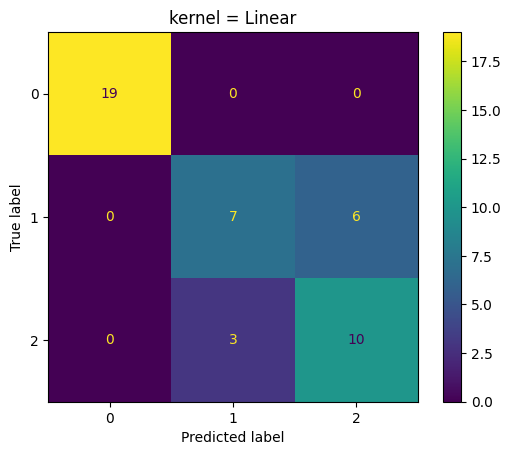

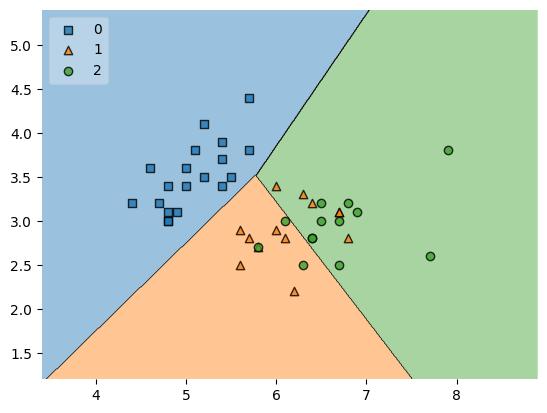

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train[:, :2], y_train)
y_pred = model.predict(X_test[:, :2])

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();
plt.title('kernel = Linear')
plt.show()

plot_decision_regions(X_test[:,:2], y_test, clf=model, legend=2)
plt.show()

## Petal Length & Petal Width

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



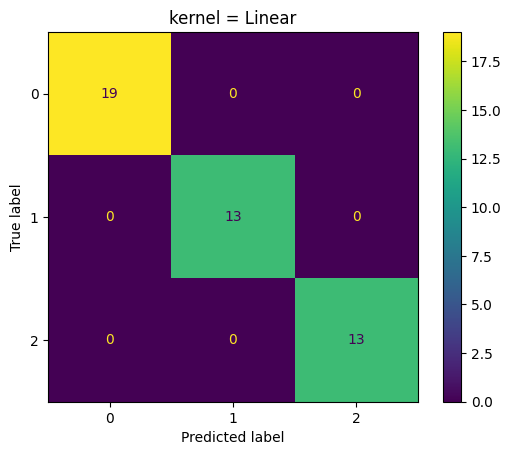

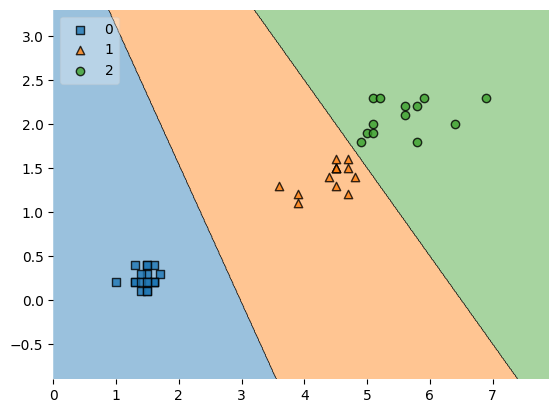

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train[:, 2:4], y_train)
y_pred = model.predict(X_test[:, 2:4])

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();
plt.title('kernel = Linear')
plt.show()

plot_decision_regions(X_test[:,2:4], y_test, clf=model, legend=2)
plt.show()

## Kernel Selection

**Kernel = RBF**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



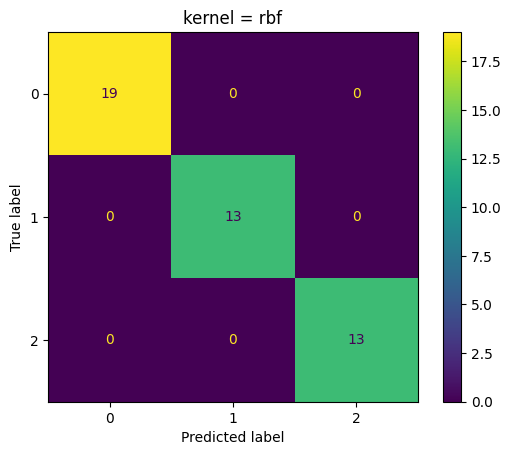

In [ ]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();
plt.title('kernel = rbf')
plt.show()

**Kernel = Poly**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



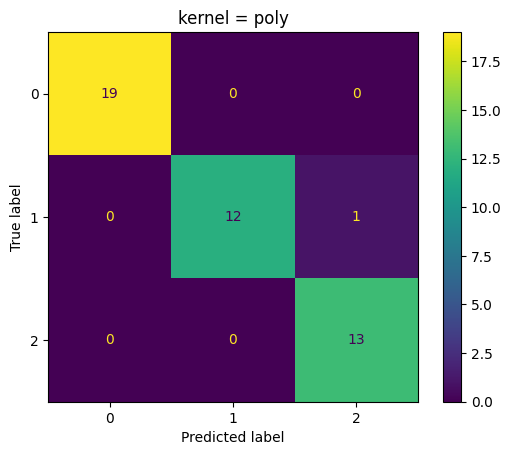

In [ ]:
model = SVC(kernel = 'poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();
plt.title('kernel = poly')
plt.show()

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
kernels = ['linear', 'poly', 'rbf']
best_param={}

for kernel in kernels:
	model = SVC(kernel=kernel)
	grid_search = GridSearchCV(model, param_grid=param)
	grid_search.fit(X_train, y_train)
	best_param[kernel] = grid_search.best_params_
	print("Optimal hyperparameters for Kernel = "+str(kernel)+ ":"+str(best_param[kernel]))
	print("Accuracy on test set for Kernel = "+str(kernel)+ ":" +str(grid_search.score(X_test, y_test)*100)+"%\n")

Optimal hyperparameters for Kernel = linear:{'C': 1, 'gamma': 0.1}
Accuracy on test set for Kernel = linear:100.0%

Optimal hyperparameters for Kernel = poly:{'C': 0.1, 'gamma': 0.1}
Accuracy on test set for Kernel = poly:100.0%

Optimal hyperparameters for Kernel = rbf:{'C': 100, 'gamma': 0.01}
Accuracy on test set for Kernel = rbf:100.0%



## Multi-class Classification

**One Vs. Rest**

Kernel = linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



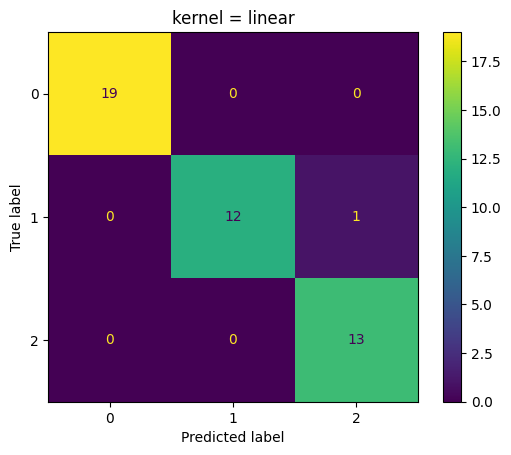

Kernel = poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



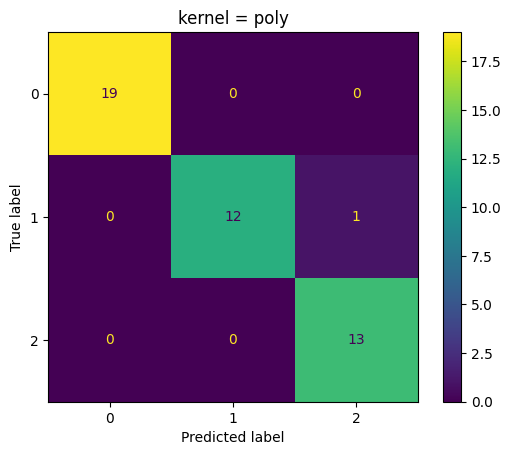

Kernel = rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



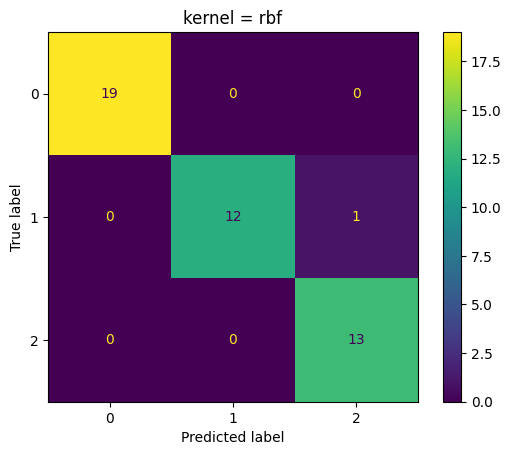

In [ ]:
#best_param['poly']['gamma']
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
	model = SVC(kernel=kernel,C=best_param[kernel]['C'],gamma=best_param[kernel]['gamma'],decision_function_shape='ovr')
	model.fit(X_train, y_train)
	print("Kernel = "+str(kernel))
	print(classification_report(y_test, y_pred))
	ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();
	plt.title('kernel = '+str(kernel))
	plt.show()

**One Vs. One**

Kernel = linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



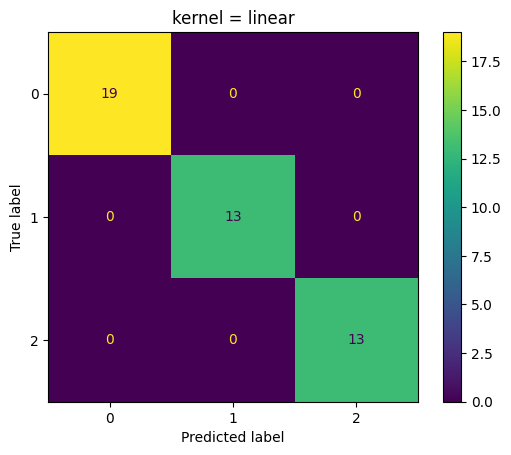

Kernel = poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



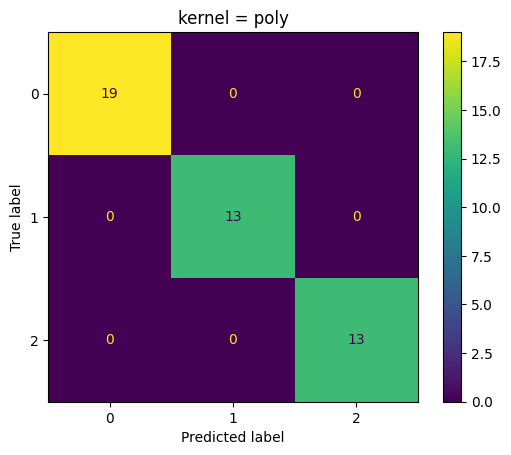

Kernel = rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



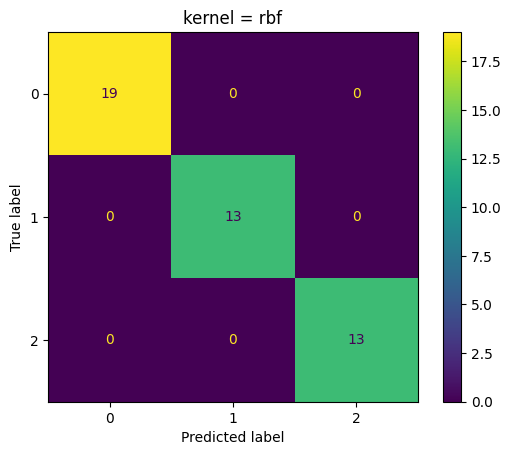

In [ ]:
kernels = ['linear', 'poly', 'rbf']
SVC()
for kernel in kernels:
	model = SVC(kernel=kernel,C=best_param[kernel]['C'],gamma=best_param[kernel]['gamma'],decision_function_shape='ovo')
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	print("Kernel = "+str(kernel))
	print(classification_report(y_test, y_pred))
	ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();
	plt.title('kernel = '+str(kernel))
	plt.show()